### Exploratory Data Analysis and Data Cleaning

This code provides the Exploratory Data Analysis for the FMCSA and Carrier Data

In [33]:
# import the required libraries
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [34]:
# Read Data files from the directory
carrierData =  pd.read_csv("../Data/carrier_equipment.csv")
fmcsa = pd.read_csv("../Data/fmcsa_2019-02-15.csv")

# Understanding basic information about the data
print("Number of rows in carrierData = ", carrierData.shape[0])
print("Number of columns in carrierData = ", carrierData.shape[1])
print("\n")
print(" *** Sample Carrier Data ******")
display(carrierData.head(5))

print("\n")
print("----------------------------------------------------------")
print("\n")


print("Number of rows in FMCSA Data = ", fmcsa.shape[0])
print("Number of columns in FMCSA Data = ", fmcsa.shape[1])
print("\n")
print("** Sample FMCSA Data **")
fmcsa.head()


Number of rows in carrierData =  6056
Number of columns in carrierData =  19


 *** Sample Carrier Data ******


,Unnamed: 0,COMPANY ID,CITY,ST,DOMICILE REGION,ZIP,TRAC,TRAIL,VAN,REFR,INTER,CURT,FLAT,STEP,DD,OVER,TANK,PNEUM,BULK
0,0,1,ANAHEIM,CA,PAC,98444,83,190,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,KENTWOOD,MI,MDW,49508,22,22,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,SHELBY TOWNSHIP,MI,MDW,48315,26,65,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,ALLENDALE,MI,MDW,49401,40,55,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,TROY,MO,CEN,63379,79,99,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




----------------------------------------------------------


Number of rows in FMCSA Data =  89612
Number of columns in FMCSA Data =  8


** Sample FMCSA Data **


,Unnamed: 0,Company ID,Commodity type Classification,Equipment types Equipment Unit,Company type Type,Equipment types Owned,Equipment types Term Leased,Equipment types Trip Leased
0,1259000,1,BUILDING_MATERIALS,TRACTOR,CARRIER,83.0,0.0,0.0
1,3162076,1,BUILDING_MATERIALS,TRAILER,CARRIER,199.0,0.0,0.0
2,128588,1,LIQUIDS_GASES,TRUCK,CARRIER,17.0,0.0,0.0
3,3229631,1,FARM_SUPPLIES,TRUCK,CARRIER,17.0,0.0,0.0
4,3245723,1,FARM_SUPPLIES,TRACTOR,CARRIER,83.0,0.0,0.0


### Basic Data Cleaning

Next, we will do some basic data cleaning activities before joining the two data frames together

In [35]:
# Remove the first column from both the data frames
carrierData.drop(carrierData.columns[0], axis = 1, inplace = True)
fmcsa.drop(fmcsa.columns[0], axis = 1, inplace = True)

## Replace all 'X' values in the carrierData to 1
carrierData.replace(to_replace="X", value = 1, inplace = True)
carrierData.replace(to_replace="x", value = 1, inplace = True)

## Check all columns with NaN values
carrierData.isna().any()

## So we can set all NaN values to 1
carrierData.fillna(value=0, inplace=True)

Next, we check if the "carrierData" or "fmcsa" has multiple rows for the same Company Id:

In [36]:
## Drop any duplicate rows from the data
carrierData.drop_duplicates(keep= False, inplace = True)
fmcsa.drop_duplicates(keep= False, inplace = True)

## Check if carrierData has repeating companyIds
carrierData.groupby('COMPANY ID').filter(lambda x: len(x) > 1).sort_values(by = ['COMPANY ID']).head()

,COMPANY ID,CITY,ST,DOMICILE REGION,ZIP,TRAC,TRAIL,VAN,REFR,INTER,CURT,FLAT,STEP,DD,OVER,TANK,PNEUM,BULK
9,10,ANTELOPE,CA,PAC,95843,26,36,1,1,0,0,0,0,0,0,0,0,0.0
3052,10,KNOXVILLE,TN,SE,37917,109,262,1,1,0,0,0,0,0,0,0,0,0.0
195,196,BROWNVILLE,OR,PAC,97327,35,71,0,0,0,0,1,0,0,0,0,0,0.0
3725,196,SOLEDAD,CA,PAC,93960,46,495,0,0,0,0,1,1,0,0,0,0,0.0
381,382,MISSISSAUGA,ON,CAN,L4T 3S8,40,63,1,1,0,0,0,0,0,0,0,0,0.0


So, we do find that there are Company Ids that are repeating the dataset.  Thus, Company Id is the not the only unique identifier for a carrier.  We will consider the company Id along with number of tractors/trailers and location information to unique define a Carrier 
 
We also find that there are some missing value in Carrier and FMCSA dataset, specifically in the Equipment Units and Commodity type information -- we will replace the missing information with another category called "Unavailable"

In [37]:
## Replace Some Missing values in the dataframe
carrierData.replace(to_replace="", value = 'Unavailable', inplace = True)
carrierData.fillna(value= 'Unavailable', inplace=True)

Next, we convert the FMCSA dataset from Long format to Wide format where we have a separate column for each Commodity type.  If a shipper carries a given commodity then the corresponding value is 1 otherwise the value is 0.  Thus, we have one row for each carrier similar to the "Carrier Dataset".  Note that we are ignoring the Number of different equipment types in this analysis and use a similar information provided in the Carrier dataset.  

In [38]:
fmcsa.fillna(value= 'Unavailable', inplace=True)

fmcsa['Val'] = 1

In [39]:
fmcsa_spread = fmcsa[['Company ID', 'Commodity type Classification', 'Val']].drop_duplicates(keep='first')

In [40]:
fmcsa_spread.head(30)

,Company ID,Commodity type Classification,Val
0,1,BUILDING_MATERIALS,1
2,1,LIQUIDS_GASES,1
3,1,FARM_SUPPLIES,1
5,1,MACHINERY_LARGE_OBJECTS,1
6,1,CHEMICALS,1
8,1,METAL_SHEETS_ROLLS,1
10,1,PAPER_PRODUCTS,1
11,1,CONSTRUCT,1
14,1,GRAIN_FEED,1
17,1,GENERAL_FREIGHT,1


In [41]:
fmcsa_spread = fmcsa_spread.pivot(index = 'Company ID', columns = 'Commodity type Classification', values = 'Val')
fmcsa_spread.fillna(value=0, inplace= True)
fmcsa_spread.reset_index()
fmcsa_spread.head()

Commodity type Classification,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,GARBAGE_TRASH,...,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL
Company ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
fmcsa_spread.index.name = 'Company ID'
fmcsa_spread.reset_index(inplace = True)

In [43]:
fmcsa_spread.head()

Commodity type Classification,Company ID,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,...,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL
0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,6,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Now, we join the Company Data and FMCSA dataset to capture only the data for which we have available "labeled" data.  Note that since we are doing an "Inner Join" here, the resulting dataset after the join only captures the labeled data.  We also store the data for the remaining carriers as Test Dataset.

In [44]:
## Inner Join FMCSA data with carrierData using CompanyId
data = pd.merge(carrierData, fmcsa_spread, how = 'inner',right_on = 'Company ID', left_on = 'COMPANY ID')

In [57]:
data.head()

,COMPANY ID,CITY,ST,DOMICILE REGION,ZIP,TRAC,TRAIL,VAN,REFR,INTER,CURT,FLAT,STEP,DD,OVER,TANK,PNEUM,BULK,Company ID,BEVERAGES,BUILDING_MATERIALS,CHEMICALS,COAL_COKE,CONSTRUCT,DRIVE_TOW,DRY_BULK,FARM_SUPPLIES,FRESH_PRODUCE,GARBAGE_TRASH,GENERAL_FREIGHT,GRAIN_FEED,HOUSEHOLD_GOODS,INTERMODAL,LIQUIDS_GASES,LIVESTOCK,LOG_POLE,MACHINERY_LARGE_OBJECTS,MEAT,METAL_SHEETS_ROLLS,MOBILE_HOMES,MOTOR_VEHICLES,OILFIELD_EQUIPMENT,OTHER,PAPER_PRODUCTS,PASSENGERS,REFRIGERATED_FOOD,US_MAIL,UTILITY,Unavailable,WATER_WELL,ONLY_VAN,VAN_REFR,VAN_FLAT,ONLY_REFR,ONLY_FLAT,REFR_FLAT
0,1,ANAHEIM,CA,PAC,98444,0.027465,0.0380,1,0,0,0,0,0,0,0,0,0,0.0,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0
1,2,KENTWOOD,MI,MDW,49508,0.007280,0.0044,1,0,0,0,0,0,0,0,0,0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0
2,3,SHELBY TOWNSHIP,MI,MDW,48315,0.008604,0.0130,0,0,0,0,1,0,0,0,0,0,0.0,3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,1,0
3,4,ALLENDALE,MI,MDW,49401,0.013236,0.0110,0,1,0,0,0,0,0,0,0,0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0
4,6,MASON,OH,MDW,45040,0.018531,0.0186,1,0,0,0,0,0,0,0,0,0,0.0,6,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0


In [46]:
### Check Sizes of the New Dataframe

print("Number of rows in Data = ", data.shape[0])
print("Number of columns in  Data = ", data.shape[1])
print("\n")


Number of rows in Data =  5317
Number of columns in  Data =  50




In [47]:
data.replace(to_replace=" ", value = 0, inplace = True)
data[['VAN','REFR','FLAT']] = data[['VAN','REFR','FLAT']].apply(pd.to_numeric)


Add new columns to show specific combinations of the Equipment types associated with each carrier:ONLY_VAN, ONLY_REFR, ONLY_FLAT, VAN_AND_REFR, VAN_AND_FLAT, and REFR_FLAT

In [48]:
### Add columns for different combination of labels - VAN, REFR, and FLAT
data['ONLY_VAN'],data['VAN_REFR'],data['VAN_FLAT'],data['ONLY_REFR'],data['ONLY_FLAT'],data['REFR_FLAT'] = [data['VAN']*(1-data['REFR'])*(1-data['FLAT']),
                                                                                                           data['VAN']*(data['REFR'])*(1-data['FLAT']),
                                                                                                           data['VAN']*(1-data['REFR'])*(data['FLAT']),
                                                                                                           (1-data['VAN'])*(data['REFR'])*(1-data['FLAT']),
                                                                                                           (1-data['VAN'])*(1-data['REFR'])*(data['FLAT']),
                                                                                                           (1-data['VAN'])*(data['REFR'])*(data['FLAT'])]


In [49]:
## Store the remaining data as test data

testData_raw = fmcsa_spread[~fmcsa_spread['Company ID'].isin(data['COMPANY ID'])]

In [88]:
# Check size of the Test Data set
print("Number of rows in the test dataset:", testData_raw.shape[0])
print("Number of columns in the test dataset:", testData_raw.shape[1])

Number of rows in the test dataset: 9913
Number of columns in the test dataset: 32


### Data Analysis Plots

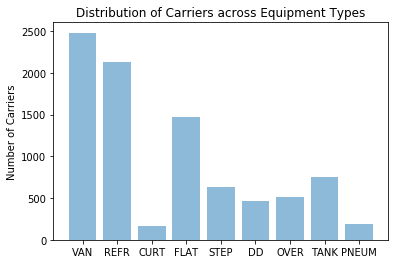

In [77]:
# Plot to show the distribution of different labels in the Training data
labelDist = data.iloc[:, 7:17].sum()
plt.bar(labelDist.index.values, labelDist, align= "center", alpha = 0.5)
plt.ylabel('Number of Carriers')
plt.title('Distribution of Carriers across Equipment Types')
plt.show()

The plot shows that VAN, REFR, and FLAT equipment types are the largest fleet among all the carriers.  For the rest of the analysis, we will only focus on these equipment types and ignore the rest of the equipment types.  

Next, we will plot the distribution of number of carriers across the combination of VAN, REFR, and FLAT equipment types

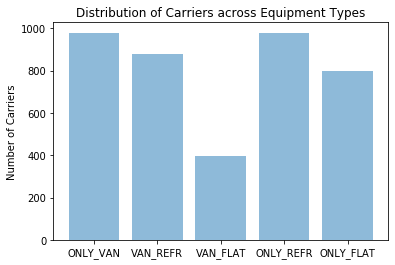

In [79]:
# Plot to show the distribution of different combination of VAN, REFR, and FLAT labels in the Training data
labelDist = data.iloc[:, 50:55].sum()
plt.bar(labelDist.index.values, labelDist, align= "center", alpha = 0.5)
plt.ylabel('Number of Carriers')
plt.title('Distribution of Carriers across Equipment Types')
plt.show()

This plot has some interesting insights:

1) The number of carriers that has only VANs and only REFRs are nearly the same.  This may point to a unique set of variables which should be able to differentiate between these carriers

2) The number of carriers that has both VAN and REFR is also high.  Whereas the the number of carriers having both VAN and FLAT equipments is lowest.  Thus, it may be possible to identify features that can idenitfy carriers having FLAT cars

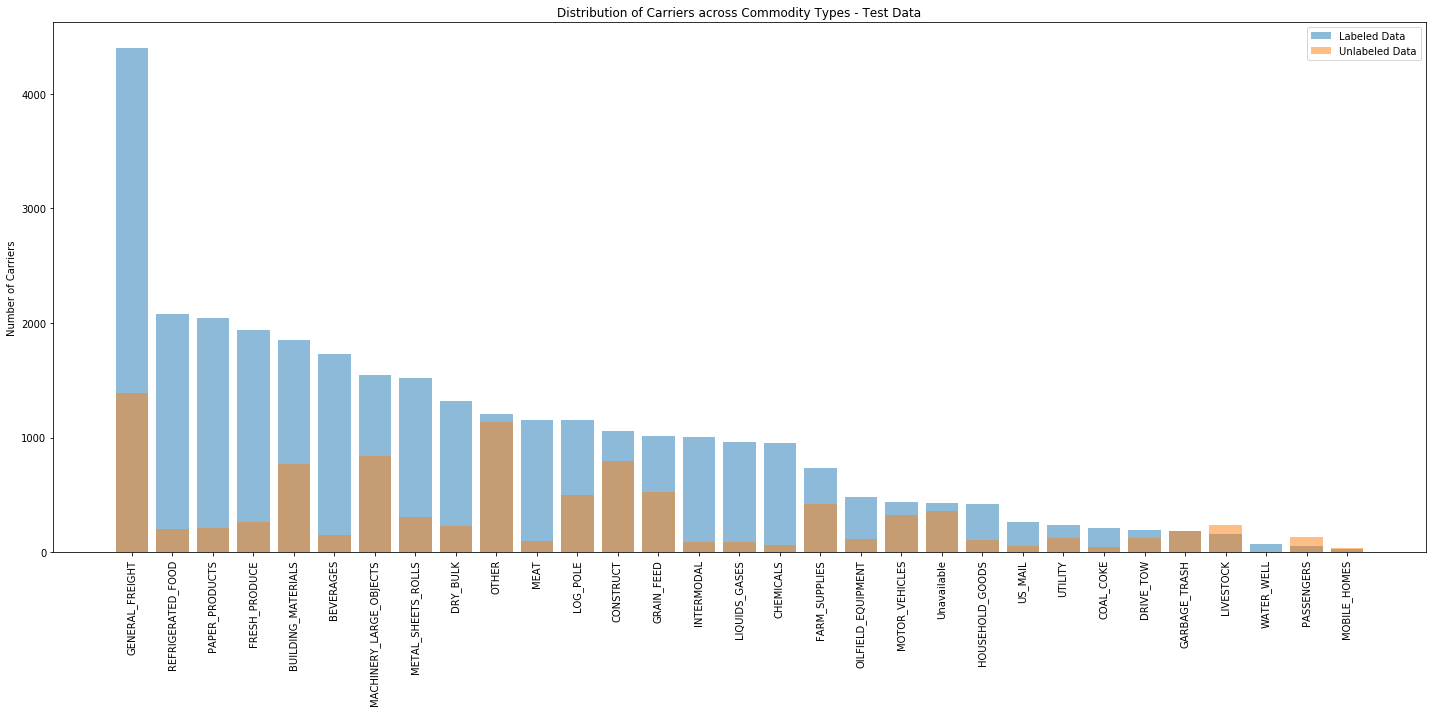

In [108]:
commodityDistributionTraining = data.iloc[:, 19:50].sum().sort_values(ascending=False)

plt.figure(figsize=(20,10)) 
plt.bar(commodityDistributionTraining.index.values, commodityDistributionTraining, align= "center", alpha = 0.5)
plt.ylabel('Number of Carriers')
plt.title('Distribution of Carriers across Commodity Types - Training Data')
plt.xticks(rotation=90)

#plt.show()

#Plot to show distribution of different commodity types in the Training and Testing Data
commodityDistributionTest = testData_raw.iloc[:, 1:31].sum().sort_values(ascending=False)
plt.bar(commodityDistributionTest.index.values, commodityDistributionTest, align= "center", alpha = 0.5)
plt.ylabel('Number of Carriers')
plt.title('Distribution of Carriers across Commodity Types - Test Data')
plt.xticks(rotation=90)
plt.legend(['Labeled Data','Unlabeled Data'])
plt.tight_layout()
plt.show()



**Understanding the distribution of commodities in Labeled Data:**

The top 5 categories of commodities carried by different carriers are: 'General Freight', 'Refrigerated Food', 'Paper Products', 'Fresh Produce', and 'Building Materials'.

This also explains the high number of VANS and REFRS in the fleet.  An initial guess will be that Carriers that carry 'General Freight' and 'Paper Products' should have VANS in their fleet.  While, carriers that carry 'Refrigerated Food' and 'Fresh Produce' should have REFRs.  'Building Material' should most likely be carried by FLAT cars.  Whether a carrier has multiple type of equipments depends on the variety in the commodity types it carries.

**Understanding the difference in the distribution of commodities in Unlabeled Data:**
1. General Freight seems to be the topmost commodity (in terms of number of carriers carrying it)
2. But, the distribution for other commodities seems quite different.  Specifically: Refrigerated Food, Paper Products, and Fresh Produce have very low numbers in the Unlabeled data.  The Other category has a very high number which may not have too much information.  The Unlabeled data also seems to have lot of carriers that have Blank values for the Commodity type.


We will next if there exists any correlation between the commodity types and the assortment of equipment types that a carrier has:

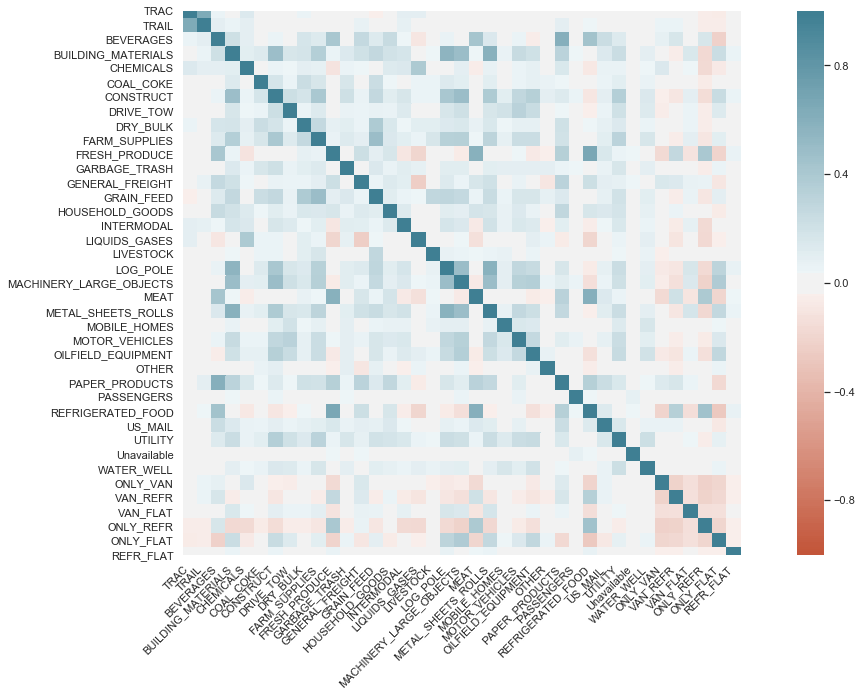

In [118]:
### Correlation between Product Types, Number of Tractors and Trailers, and Equipment type combinations
import seaborn as sns

data_cor = data.iloc[:,  np.r_[5:7,19:56]]

corr = data_cor.corr()

sns.set(rc={'figure.figsize':(20, 10)})

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


Though, we do not find very significant correlation between any two variables (dependent or independent), we do see some relationships:
1. There is a positive correlation between Refrigerated_Food, Fresh Produce, Meat, and ONLY_REFR
2. There is also a similar correlation between Log_Pole, Building_Materials, and ONLY_FLAT

We see similar relationships between commodity types carried by a shipper and its assortment of fleets

### Create Training and Validation sets

In [52]:
## Scale the Number of Trailer and Tractors columns using MinMax scaler
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

data[['TRAC', 'TRAIL']] = mms.fit_transform(data[['TRAC', 'TRAIL']])

In [53]:
from sklearn.model_selection import train_test_split

## Split the data into training and validation set with 80% data for training
train, val = train_test_split(data, test_size = 0.2)



In [55]:
## Store data to be read for model building later
os.makedirs("../Data/Output/")
train.to_csv("../Data/Output/TrainingData.csv")
val.to_csv("../Data/Output/ValidationData.csv")